# RooFit example 101: Basics

Text(0.5, 1.0, 'Gaussian pdf with data')

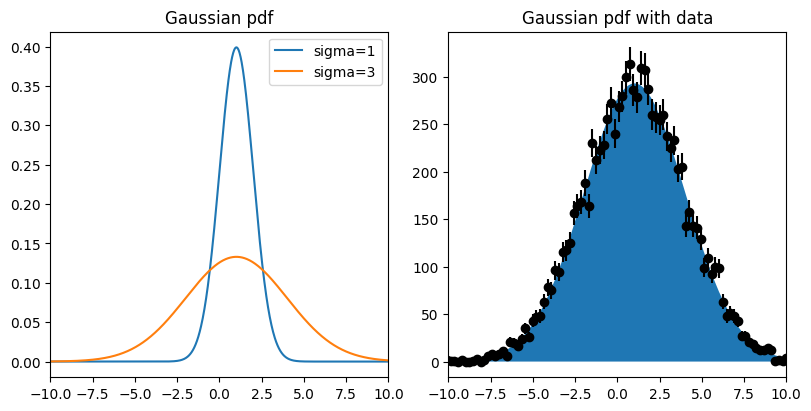

In [9]:
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL
from iminuit.stats import truncnorm
from matplotlib import pyplot as plt
import numpy as np


xrange = (-10, 10)

def model(x, mu, sigma):
    return truncnorm.pdf(x, *xrange, mu, sigma)

rng = np.random.default_rng(1)
x = truncnorm(*xrange, 1, 3).rvs(10000, random_state=rng)

c = UnbinnedNLL(x, model)
m = Minuit(c, 1, 3)
m.limits["mu"] = (-10, 10)
m.limits["sigma"] = (0.1, 10)
m.migrad()

fig, ax = plt.subplots(1, 2, figsize=(8, 4), 
                       sharex=True, constrained_layout=True)

plt.sca(ax[0])
xm = np.linspace(*xrange, 1000)
plt.plot(xm, model(xm, 1, 1), label="sigma=1")
plt.plot(xm, model(xm, 1, 3), label="sigma=3")
plt.legend()
plt.xlim(*xrange)
plt.title("Gaussian pdf")

plt.sca(ax[1])
m.visualize(bins=100)
plt.xlim(*xrange)
plt.title("Gaussian pdf with data")

Welcome to JupyROOT 6.26/10
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         1.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 sigma        3.00000e+00  9.90000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=25019.2 FROM MIGRAD    STATUS=INITIATE       10 CALLS          11 TOTAL
                     EDM= unknown

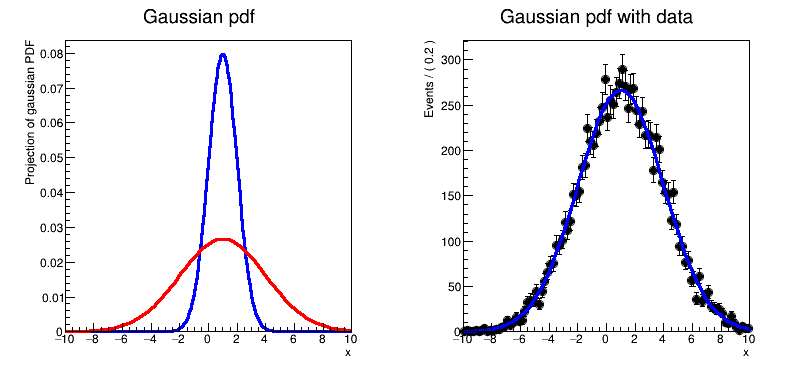

In [1]:
import ROOT
 
# Set up model
# ---------------------
# Declare variables x,mean,sigma with associated name, title, initial
# value and allowed range
x = ROOT.RooRealVar("x", "x", -10, 10)
mean = ROOT.RooRealVar("mean", "mean of gaussian", 1, -10, 10)
sigma = ROOT.RooRealVar("sigma", "width of gaussian", 1, 0.1, 10)
 
# Build gaussian pdf in terms of x,mean and sigma
gauss = ROOT.RooGaussian("gauss", "gaussian PDF", x, mean, sigma)
 
# Construct plot frame in 'x'
xframe = x.frame(Title="Gaussian pdf")  # RooPlot
 
# Plot model and change parameter values
# ---------------------------------------------------------------------------
# Plot gauss in frame (i.e. in x)
gauss.plotOn(xframe)
 
# Change the value of sigma to 3
sigma.setVal(3)
 
# Plot gauss in frame (i.e. in x) and draw frame on canvas
gauss.plotOn(xframe, LineColor="r")
 
# Generate events
# -----------------------------
# Generate a dataset of 1000 events in x from gauss
data = gauss.generate({x}, 10000)  # ROOT.RooDataSet
 
# Make a second plot frame in x and draw both the
# data and the pdf in the frame
xframe2 = x.frame(Title="Gaussian pdf with data")  # RooPlot
data.plotOn(xframe2)
gauss.plotOn(xframe2)
 
# Fit model to data
# -----------------------------
# Fit pdf to data
gauss.fitTo(data)
 
# Print values of mean and sigma (that now reflect fitted values and
# errors)
mean.Print()
sigma.Print()
 
# Draw all frames on a canvas
c = ROOT.TCanvas("rf101_basics", "rf101_basics", 800, 400)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
xframe.GetYaxis().SetTitleOffset(1.6)
xframe.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
xframe2.GetYaxis().SetTitleOffset(1.6)
xframe2.Draw()
 
c.Draw()